In [3]:
import lightkurve as lk
from astropy import units as u
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

In [4]:
star = 'TIC 292404647'

In [5]:
lc = lk.search_lightcurve(star, author = 'SPOC', sector = 18).download()
print('Metadata of lightcurve of star:',star,'\n')
{k: v for k, v in lc.meta.items() if k != 'FILENAME'}

Metadata of lightcurve of star: TIC 292404647 



{'INHERIT': True,
 'EXTNAME': 'PRIMARY',
 'EXTVER': 1,
 'SIMDATA': False,
 'TELESCOP': 'TESS',
 'INSTRUME': 'TESS Photometer',
 'OBJECT': 'TIC 292404647',
 'TICID': 292404647,
 'RADESYS': 'ICRS',
 'RA_OBJ': 32.1834732881428,
 'DEC_OBJ': 45.0960565496668,
 'EQUINOX': 2000.0,
 'EXPOSURE': 19.291588873767,
 'TIMEREF': 'SOLARSYSTEM',
 'TASSIGN': 'SPACECRAFT',
 'TIMESYS': 'TDB',
 'BJDREFI': 2457000,
 'BJDREFF': 0.0,
 'TIMEUNIT': 'd',
 'TELAPSE': 24.358066759807,
 'LIVETIME': 19.291588873767058,
 'TSTART': 1790.660909257375,
 'TSTOP': 1815.0189757857,
 'DATE-OBS': '2019-11-03T03:50:33.376',
 'DATE-END': '2019-11-27T12:26:10.324',
 'DEADC': 0.792,
 'TIMEPIXR': 0.5,
 'TIERRELA': 1.16e-05,
 'INT_TIME': 1.98,
 'READTIME': 0.02,
 'FRAMETIM': 2.0,
 'NUM_FRM': 60,
 'TIMEDEL': 0.001388888888888889,
 'BACKAPP': True,
 'DEADAPP': True,
 'VIGNAPP': True,
 'GAINA': 5.28000020980835,
 'GAINB': 5.260000228881836,
 'GAINC': 5.25,
 'GAIND': 5.210000038146973,
 'READNOIA': 9.873600006103516,
 'READNOIB': 7.6

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

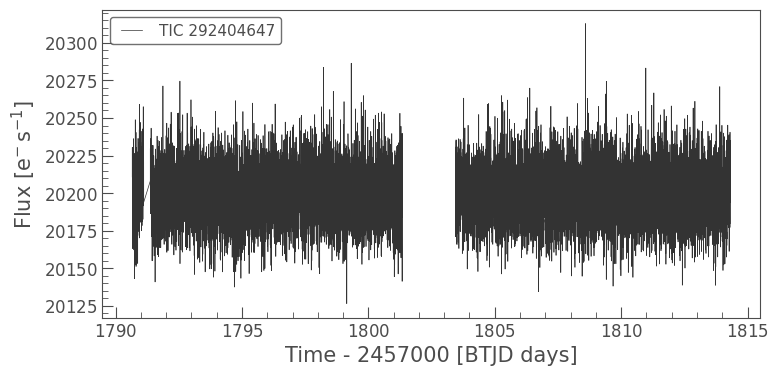

In [6]:
lc.plot()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

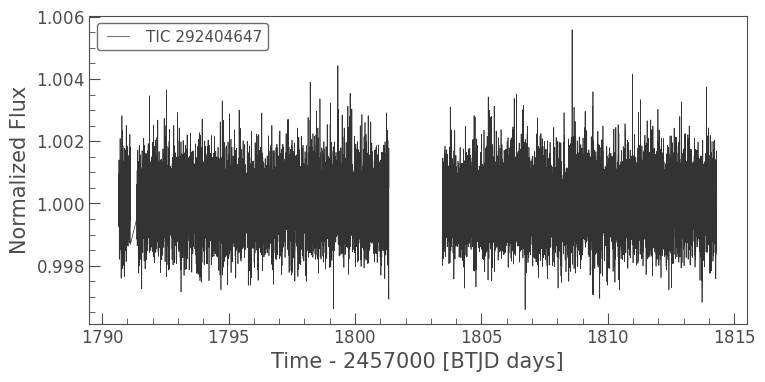

In [11]:
flat_lc = lc.flatten()
flat_lc.plot()

<Axes: xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

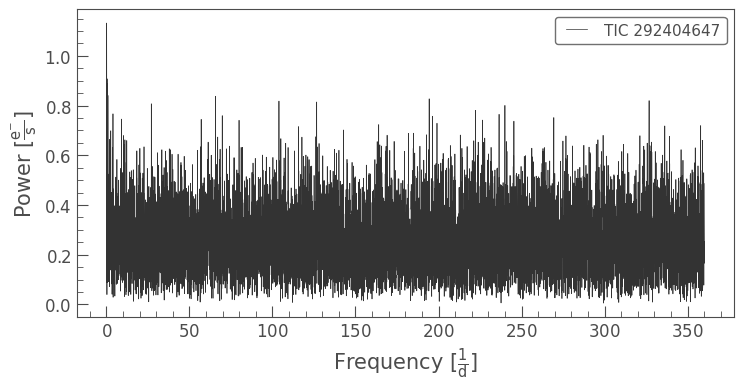

In [12]:
pg = lc.to_periodogram(oversample_factor = 1)
pg.plot()

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

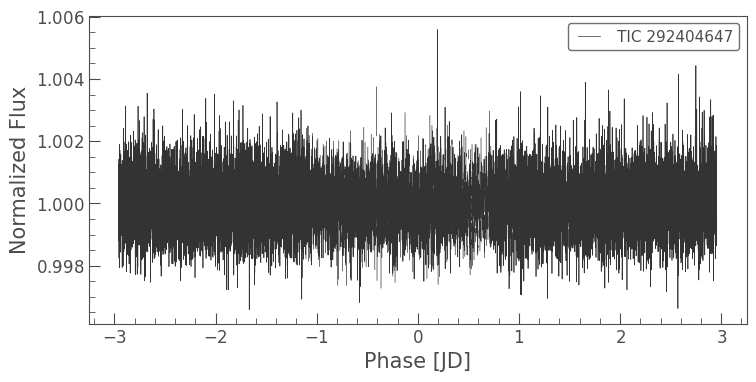

In [13]:
fold_lc = flat_lc.fold(period = pg.period_at_max_power)
fold_lc.plot()

In [10]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial

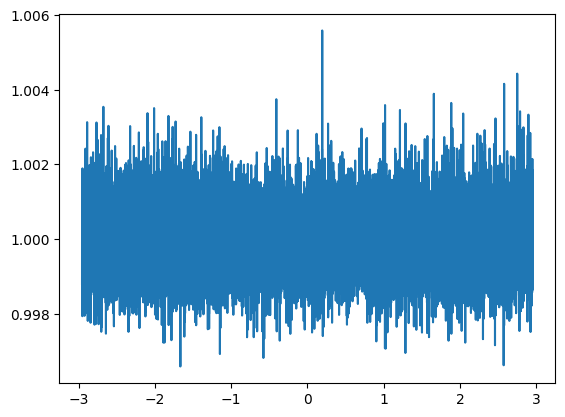

In [54]:
time_days = fold_lc['time'].to(u.day).value
mask = ~fold_lc['flux'].mask
time = time_days[mask]
flux = fold_lc['flux'][mask].value

plt.plot(time, flux)

In [44]:
coeffs = Polynomial.fit(time, flux, deg=6)
trend = coeffs(time_days)
detrended_flux_polynomial = fold_lc['flux'] - trend*fold_lc['flux'].unit
plt.plot(time_days, detrended_flux_polynomial)
plt.plot()

In [46]:
from scipy.interpolate import UnivariateSpline

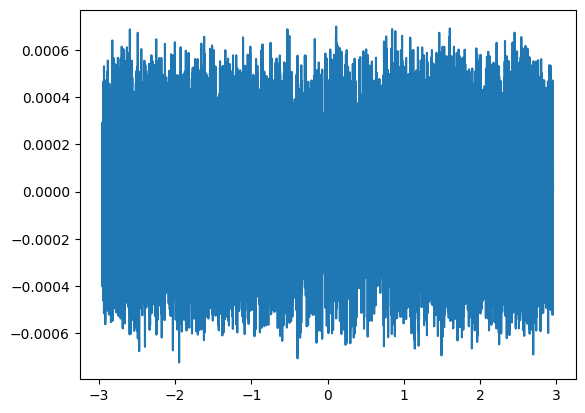

In [53]:
spline = UnivariateSpline(time, flux, s = 1e-3)
detrended_flux_spline = flux - spline(time)
plt.plot(time, detrended_flux_spline)